In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [21]:
#read the file
movie_data_df = pd.read_csv("Resources/data.csv")
movie_data_df

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ..."
9996,9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'..."
9997,9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr..."
9998,9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer',...","['An', 'intimate', 'relationship', 'between', ..."


In [22]:
#rename the movie name column
movie_data_df= movie_data_df.rename(columns={"Year of Release" : "Year",
                                            "Run Time in minutes" : "Run Time(mins)",
                                            "Movie Rating": "Rating"})
movie_data_df.head()

,Unnamed: 0,Movie Name,Year,Run Time(mins),Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [54]:
#create new df for usable data
movie_reduced_df = movie_data_df[["Movie Name", "Year", "Run Time(mins)", "Rating", "Gross"]]
print(movie_reduced_df.count())
movie_reduced_df


Movie Name        10000
Year              10000
Run Time(mins)    10000
Rating            10000
Gross              7085
dtype: int64


,Movie Name,Year,Run Time(mins),Rating,Gross
0,The Shawshank Redemption,1994,142,9.3,28340000.0
1,The Godfather,1972,175,9.2,134970000.0
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,NaN
3,The Chaos Class,1975,87,9.2,NaN
4,The Dark Knight,2008,152,9.0,534860000.0
...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,1010000.0
9996,Not to Forget,2021,84,4.9,NaN
9997,Housefull 3,2016,140,4.9,1160000.0
9998,A.I. Rising,2018,85,4.9,NaN


In [26]:
movie_cleaned_df = movie_reduced_df.dropna(how="any")
print(movie_cleaned_df.count())
movie_cleaned_df.head()

Movie Name        7085
Year              7085
Run Time(mins)    7085
Rating            7085
Gross             7085
dtype: int64


,Movie Name,Year,Run Time(mins),Rating,Gross
0,The Shawshank Redemption,1994,142,9.3,28340000.0
1,The Godfather,1972,175,9.2,134970000.0
4,The Dark Knight,2008,152,9.0,534860000.0
5,Schindler's List,1993,195,9.0,96900000.0
6,The Lord of the Rings: The Return of the King,2003,201,9.0,377850000.0


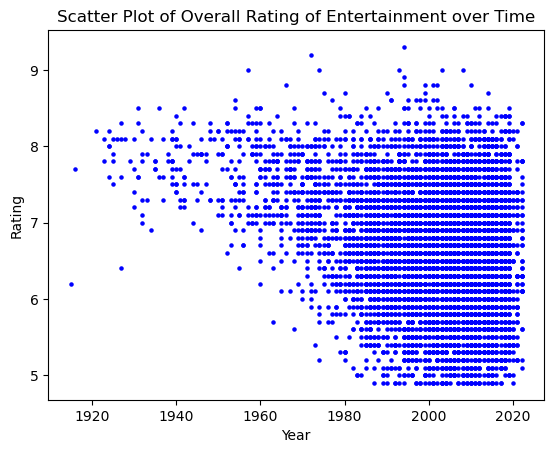

In [47]:
#scatter plot time :D

fig1, ax1 = plt.subplots()
plt.scatter(movie_cleaned_df['Year'],movie_cleaned_df['Rating'], marker = 'o', color = 'blue', s = 5)
plt.title("Scatter Plot of Overall Rating of Entertainment over Time")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

In [56]:
movies_per_year = movie_cleaned_df.groupby(['Year']).size().reset_index()
movies_per_year

,Year,0
0,1915,1
1,1916,1
2,1921,1
3,1923,2
4,1924,4
...,...,...
98,2018,217
99,2019,142
100,2020,31
101,2021,45


In [57]:
movies_per_year.columns = ["Year", "Number of Movies"]
movies_per_year

,Year,Number of Movies
0,1915,1
1,1916,1
2,1921,1
3,1923,2
4,1924,4
...,...,...
98,2018,217
99,2019,142
100,2020,31
101,2021,45


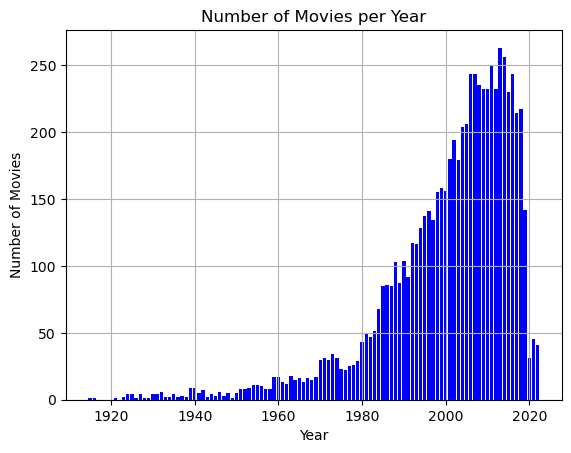

In [58]:
x_value = movies_per_year["Year"]
y_value = movies_per_year["Number of Movies"]
plt.bar(x_value, y_value, color = "blue")
plt.title("Number of Movies per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid()
plt.show()

In [64]:
# finding avg rating per year
avg_data = movie_cleaned_df.groupby(['Year'])[["Rating"]].mean().reset_index()

print(avg_data["Rating"].mean())
avg_data

7.191294450730728


,Year,Rating
0,1915,6.200000
1,1916,7.700000
2,1921,8.200000
3,1923,7.950000
4,1924,7.950000
...,...,...
98,2018,6.630876
99,2019,6.626761
100,2020,6.232258
101,2021,6.560000


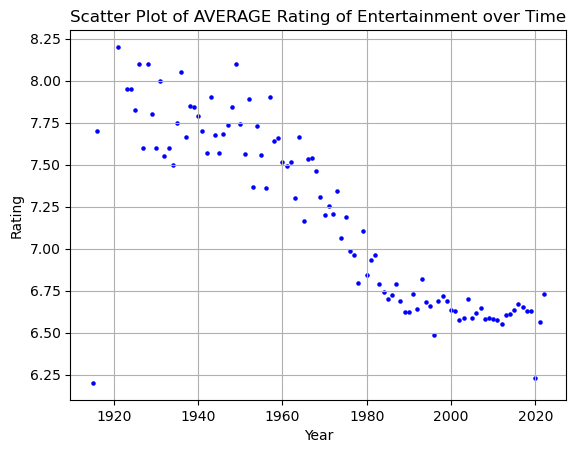

In [61]:
fig1, ax1 = plt.subplots()
plt.scatter(avg_data['Year'],avg_data['Rating'], marker = 'o', color = 'blue', s = 5)
plt.title("Scatter Plot of AVERAGE Rating of Entertainment over Time")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.grid()
plt.show()

In [59]:
#linear regression
def linear_regress(x, y, eqn_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    print(f"The r-value is: {rvalue}")
    print(f"The p-value is: {pvalue}")

The r-value is: -0.8668179924621057
The p-value is: 2.719835163770518e-32


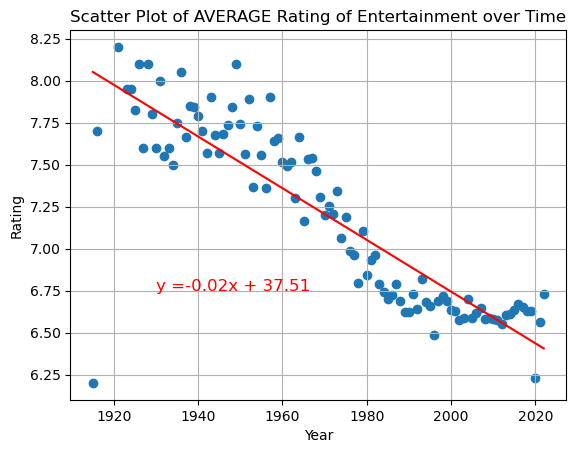

In [60]:
x = avg_data['Year']
y = avg_data['Rating']
linear_regress(x, y, (1930,6.75))
plt.title("Scatter Plot of AVERAGE Rating of Entertainment over Time")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.grid()
plt.show()